Logistic Regression

__________________________________________________________________________________________________

-> Load Data and split into train and test

In [113]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

In [114]:
train = pd.read_csv("data/train_clean.csv")

In [115]:
train.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,Q,Title
0,0,0,3,1,22.0,1,0,7.2500,1,0,1
1,1,1,1,0,38.0,1,0,71.2833,0,0,2
2,2,1,3,0,26.0,0,0,7.9250,1,0,2
3,3,1,1,0,35.0,1,0,53.1000,1,0,2
4,4,0,3,1,35.0,0,0,8.0500,1,0,1


In [116]:
train.drop(["Unnamed: 0"], axis=1 ,inplace=True)

In [117]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,Q,Title
0,0,3,1,22.0,1,0,7.2500,1,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,2
2,1,3,0,26.0,0,0,7.9250,1,0,2
3,1,1,0,35.0,1,0,53.1000,1,0,2
4,0,3,1,35.0,0,0,8.0500,1,0,1


In [118]:
X_train = train.iloc[:, 1:10]
y_train = train.iloc[:, 0]

In [119]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)

In [120]:
X_train

array([[ 0.82737724,  0.73769513, -0.53719199, ...,  0.61930636,
        -0.30756234, -0.78451788],
       [-1.56610693, -1.35557354,  0.6672755 , ..., -1.61470971,
        -0.30756234,  0.81870558],
       [ 0.82737724, -1.35557354, -0.23607512, ...,  0.61930636,
        -0.30756234,  0.81870558],
       ...,
       [ 0.82737724, -1.35557354, -0.53719199, ...,  0.61930636,
        -0.30756234,  0.81870558],
       [-1.56610693,  0.73769513, -0.23607512, ..., -1.61470971,
        -0.30756234, -0.78451788],
       [ 0.82737724,  0.73769513,  0.21560019, ..., -1.61470971,
         3.25137334, -0.78451788]])

In [121]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [122]:
test = pd.read_csv("data/test.csv")

In [123]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
def age_imputation (cols):
    Age = cols[0]
    Sex = cols[1]
    Pclass = cols[2]
    
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 'male':
            return 40
        elif Pclass == 1 and Sex == 'female':
            return 35
        elif Pclass == 2 and Sex == 'male':
            return 30
        elif Pclass == 2 and Sex == 'female':
            return 28
        elif Pclass == 3 and Sex == 'male':
            return 25
        elif Pclass == 3 and Sex == 'female':
            return 22
    else:
        return Age

In [125]:
X_test = pd.read_csv('data/test.csv')
X_test['Age'] = X_test[['Age','Sex','Pclass']].apply(age_imputation,axis=1)
X_test['Sex'] = X_test['Sex'].apply(lambda x: gender(x))
X_test['S'] = X_test['Embarked'].apply(lambda x: southampton(x))
X_test['Q'] = X_test['Embarked'].apply(lambda x: queenstown(x))
X_test['Title'] = X_test['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())
X_test['Title'] = X_test['Title'].apply(lambda x: title_cat(x))
X_test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [126]:
def gender (val):
    if val == 'male':
        return 1
    else:
        return 0

In [127]:
def southampton (col):
    Embarked = col
    
    if Embarked == 'S':
        return 1
    else:
        return 0

def queenstown (col):
    Embarked = col
    
    if Embarked == 'Q':
        return 1
    else:
        return 0

In [128]:
def title_cat (x):
    if x == 'Mr':
        return 1
    elif x == 'Miss' or x == 'Mrs' or x == 'Ms' or x == 'Mme' or x == 'Lady' or x == 'Mlle':
        return 2
    else:
        return 3

In [129]:
X_test = pd.read_csv('data/test.csv')
X_test['Age'] = X_test[['Age','Sex','Pclass']].apply(age_imputation,axis=1)
X_test['Sex'] = X_test['Sex'].apply(lambda x: gender(x))
X_test['S'] = X_test['Embarked'].apply(lambda x: southampton(x))
X_test['Q'] = X_test['Embarked'].apply(lambda x: queenstown(x))
X_test['Title'] = X_test['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())
X_test['Title'] = X_test['Title'].apply(lambda x: title_cat(x))
X_test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [130]:
sc_test = preprocessing.StandardScaler()
X_test.fillna(X_train.mean(), inplace=True)
X_test = sc_test.fit_transform(X_test)
X_test

array([[ 0.87348191,  0.75592895,  0.39578146, ..., -1.35067551,
         2.84375747, -0.79653256],
       [ 0.87348191, -1.32287566,  1.36279485, ...,  0.74037028,
        -0.35164743,  0.82761676],
       [-0.31581919,  0.75592895,  2.52321092, ..., -1.35067551,
         2.84375747, -0.79653256],
       ...,
       [ 0.87348191,  0.75592895,  0.70522575, ...,  0.74037028,
        -0.35164743, -0.79653256],
       [ 0.87348191,  0.75592895, -0.33914872, ...,  0.74037028,
        -0.35164743, -0.79653256],
       [ 0.87348191,  0.75592895, -0.33914872, ..., -1.35067551,
        -0.35164743,  2.45176608]])

In [131]:
y_test = pd.read_csv('data/gender_submission.csv')
y_test.drop(['PassengerId'],axis=1,inplace=True)

__________________________________________________________________________________________________________
-> Fit and predict the model the logistic regression model

In [132]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [133]:
yhat = LR.predict(X_test)
print(yhat)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


check accuracy of the model

In [134]:
# simularity of sample set -> intersection of union of A and B
print("accuracy is: " + str(round(jaccard_score(y_test, yhat)*100, 2)) + "%")

accuracy is: 87.43%


In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)

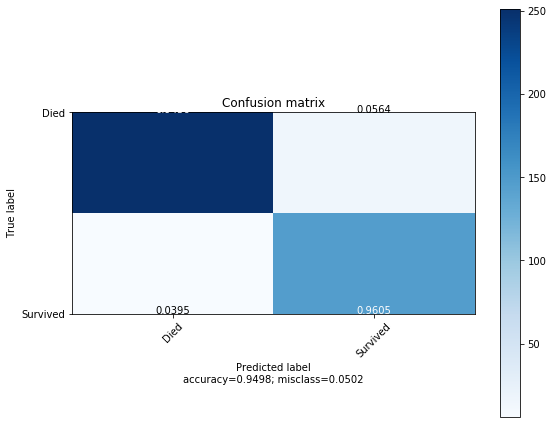

In [143]:
from plotting import plot_confusion_matrix
plot_confusion_matrix(cm, ['Died', 'Survived'])